{'R01035': '63,6502', 'R01235': '52,5123', 'R01239': '54,6405'}


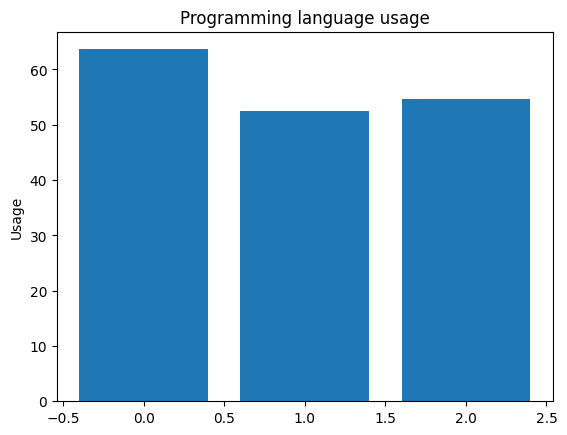

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


from urllib.request import urlopen
from xml.etree import ElementTree as ET

def get_currencies(currencies_ids_lst=['R01239', 'R01235', 'R01035']):

    cur_res_str = urlopen("http://www.cbr.ru/scripts/XML_daily.asp")

    result = {}

    cur_res_xml = ET.parse(cur_res_str)

    root = cur_res_xml.getroot()
    valutes = root.findall('Valute')
    for el in valutes:
        valute_id = el.get('ID')

        if str(valute_id) in currencies_ids_lst:
            valute_cur_val = el.find('Value').text
            result[valute_id] = valute_cur_val

    return result


# TODO 0 

# Вывести на графике 10 валют (получить по кодам валюты из ЦБС)

cur_vals = get_currencies()

objects = cur_vals.keys()

print(cur_vals)
y_pos = np.arange(len(objects))

# TODO #1 переписать лямбда-функцию из следующей строки через list comprehension 

# или генераторы списков (как мы их называем)
performance = list(map(lambda x: float(x.replace(",",".")), cur_vals.values()))

# TODO #2 

#  Подписи должны быть у осей (x, y), у графика, у «рисок» (тиков), 
# столбцы должны быть разных цветов с легендой

# TODO #3 

# Нарисовать отдельный график с колебанием одной (выбранной вами) валюты
# (получить данные с сайта ЦБ за год) и отобразить его наиболее 
# оптимальным образом (типом графика)

# TODO #4 

# Отобразить это на одном изображении (2 графика)

plt.bar(y_pos, performance)
# plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')



plt.show()

Результат:

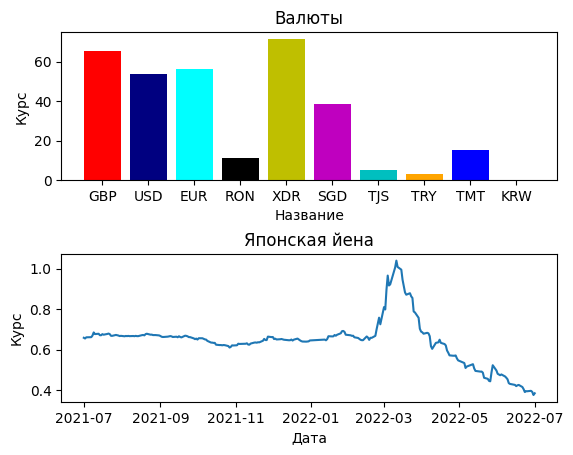

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import ast


from urllib.request import urlopen
from xml.etree import ElementTree as ET
from datetime import timedelta, datetime

def get_currencies(currencies_ids_lst=['R01239', 'R01235', 'R01035', 'R01815', 'R01585F', 'R01589', 'R01625', 'R01670', 'R01700J', 'R01710A']):

    cur_res_str = urlopen("http://www.cbr.ru/scripts/XML_daily.asp")

    result = {}

    cur_res_xml = ET.parse(cur_res_str)

    root = cur_res_xml.getroot()
    valutes = root.findall('Valute')
    for el in valutes:
        valute_id = el.get('ID')

        if str(valute_id) in currencies_ids_lst:
            result[el.find('CharCode').text] = float(el.find('Value').text.replace(",",".")) / float(el.find('Nominal').text.replace(",","."))

    return result

def get_currency(currency_id='R01820'):

    date = datetime.now()

    cur_res_str = urlopen("http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=" + (date - timedelta(days=365)).strftime("%d/%m/%Y") + "&date_req2=" + date.strftime("%d/%m/%Y") + "&VAL_NM_RQ=" + currency_id)

    result = {}

    cur_res_xml = ET.parse(cur_res_str)

    root = cur_res_xml.getroot()
    records = root.findall('Record')
    for record in records:
      result[datetime.strptime(record.get('Date'), "%d.%m.%Y")] = float(record.find('Value').text.replace(",","."))/float(record.find('Nominal').text.replace(",","."))

    return result


cur_vals = get_currencies()

plt.subplot(2, 1, 1)

plt.title('Валюты')
plt.ylabel('Курс')
plt.xlabel('Название')

names = list(cur_vals.keys())
values = [i for i in cur_vals.values()]

plt.bar(names, values, color = ['red', 'navy', 'aqua', 'k', 'y', 'm', 'c', 'orange', 'blue', 'green'])

# График изменения курса валюты

cur_val = get_currency()

plt.subplot(2, 1, 2)

# Отступ между графиками
plt.subplots_adjust(hspace=0.5)

plt.title('Японская йена')
plt.ylabel('Курс')
plt.xlabel('Дата')

dates = list(cur_val.keys())
values = [i for i in cur_val.values()]

plt.plot(dates, values)

plt.show()